# The database has been downloaded.
# An allocation of data has been made.
# Values that have not been adjusted are excluded.

In [ ]:
base_imputacao<-base_rain %>% group_by(Location) %>% summarize(media=round(mean(Temp3pm,na.rm = TRUE),2)) 
head(base_imputacao,8)

## This "FOR" was used for data imputation.

In [ ]:
### É PRECISO FAZER DE UMA VEZ.. E NAO CAI O SISTEMA..

### Repetir com: MinTemp,MaxTemp,Thermal_Amplitude,Rainfall,Evaporation,Sunshine,WindGustSpeed,
### WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am ,Pressure3pm ,Cloud9am,Cloud3pm,
### Temp9am,Temp3pm 




    

       for(i in 1 : nrow(base_imputacao)){
    
indice<-base_rain %>% select(Indice,Location,Temp3pm) %>% filter(Location == base_imputacao$Location[i],is.na(Temp3pm))

base_rain$Temp3pm[c(indice$Indice)]<-base_imputacao$media[i]
} 
    




In [ ]:
base_rain<-base_rain[complete.cases(base_rain),]

### Identify column NAs.

In [ ]:
qtd_NAs<-NULL
for(i in 1 : length(base_rain)){
    qtd_NAs[i]<-sum(is.na(base_rain[,i]))
}
qtd_NAs

 #  Imported database without NAs.

In [45]:
library(tidyverse)
library(lubridate)
library(data.table)
library(lubridate)

In [46]:
base_complete<-fread("../input/data-set-base-rain/baseRain.csv",sep = "auto",sep2 = "auto",integer64 = "numeric",encoding = "UTF-8")

# Adding index to the database.

In [47]:
base_complete$Indice<-c(1: nrow(base_complete))
head(base_complete,3)

Indice,Date,Year,Meses_ano,Location,MinTemp,MaxTemp,Thermal_Amplitude,Rainfall,Evaporation,⋯,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
<int>,<date>,<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>
1,2009-01-01,2009,Jan,Cobar,17.9,35.2,17.3,0,12.0,⋯,20,13,1006.3,1004.4,2,5,26.6,33.4,No,No
2,2009-01-02,2009,Jan,Cobar,18.4,28.9,10.5,0,14.8,⋯,30,8,1012.9,1012.1,1,1,20.3,27.0,No,No
3,2009-01-04,2009,Jan,Cobar,19.4,37.6,18.2,0,10.8,⋯,42,22,1012.3,1009.2,1,6,28.7,34.9,No,No


In [48]:

temperature_per_year<-base_complete %>% group_by(Year) %>% summarize(Media_MaxTemp_ano=round(mean(MaxTemp,na.rm = TRUE,Qtd=n()),2),Media_MinTemp_ano=round(mean(MinTemp,na.rm = TRUE,Qtd=n()),2))

`summarise()` ungrouping output (override with `.groups` argument)



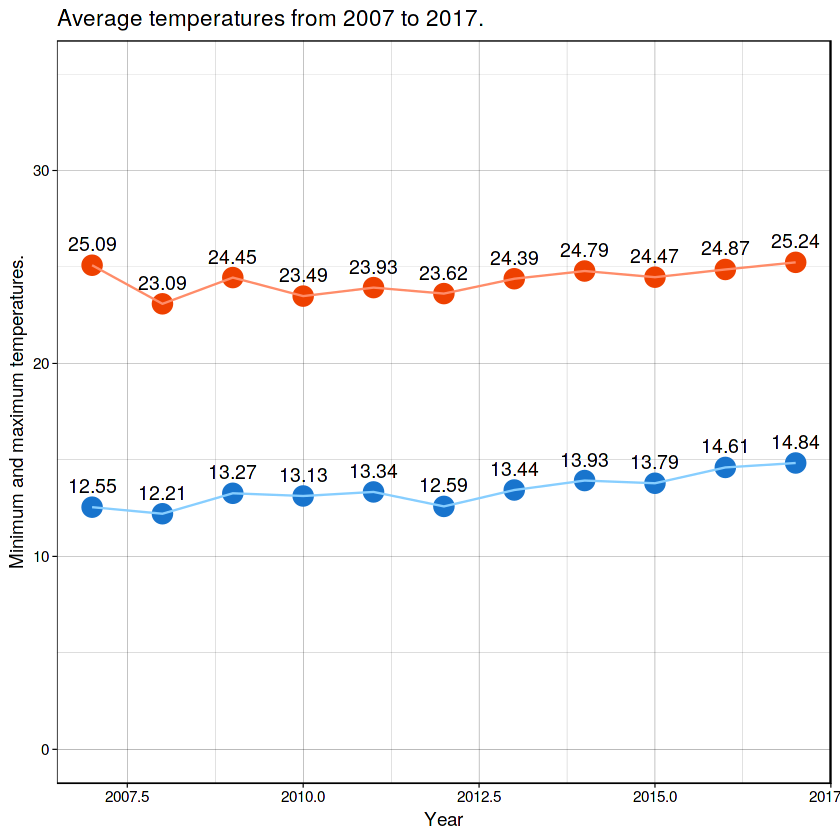

In [49]:
temperature_per_year %>%
    ggplot(mapping = aes(x =Year ))+
        ylim(0,35)+
    geom_point(aes(y =Media_MaxTemp_ano ),color="#EE4000", size=5)+
        geom_line(aes(y =Media_MaxTemp_ano),color="#FF8C69")+
            geom_text(aes(y=Media_MaxTemp_ano,label=Media_MaxTemp_ano),vjust=-1,size=4)+
                geom_point(aes(y =Media_MinTemp_ano ),color="#1874CD", size=5)+
                    geom_line(aes(y =Media_MinTemp_ano ),color="#87CEFF")+
                            geom_text(aes(y=Media_MinTemp_ano,label=Media_MinTemp_ano),vjust=-1,size=4)+
                                theme_linedraw()+
                                    ggtitle(label = "Average temperatures from 2007 to 2017.")+
                                        ylab(label = "Minimum and maximum temperatures.")
                                
                            
                

In [50]:
names(base_complete)
base_complete$Meses_ano<-as_factor(base_complete$Meses_ano)

[1] "Indice"            "Date"              "Year"             
 [4] "Meses_ano"         "Location"          "MinTemp"          
 [7] "MaxTemp"           "Thermal_Amplitude" "Rainfall"         
[10] "Evaporation"       "Sunshine"          "WindGustDir"      
[13] "WindGustSpeed"     "WindDir9am"        "WindDir3pm"       
[16] "WindSpeed9am"      "WindSpeed3pm"      "Humidity9am"      
[19] "Humidity3pm"       "Pressure9am"       "Pressure3pm"      
[22] "Cloud9am"          "Cloud3pm"          "Temp9am"          
[25] "Temp3pm"           "RainToday"         "RainTomorrow"

`summarise()` regrouping output by 'Year' (override with `.groups` argument)



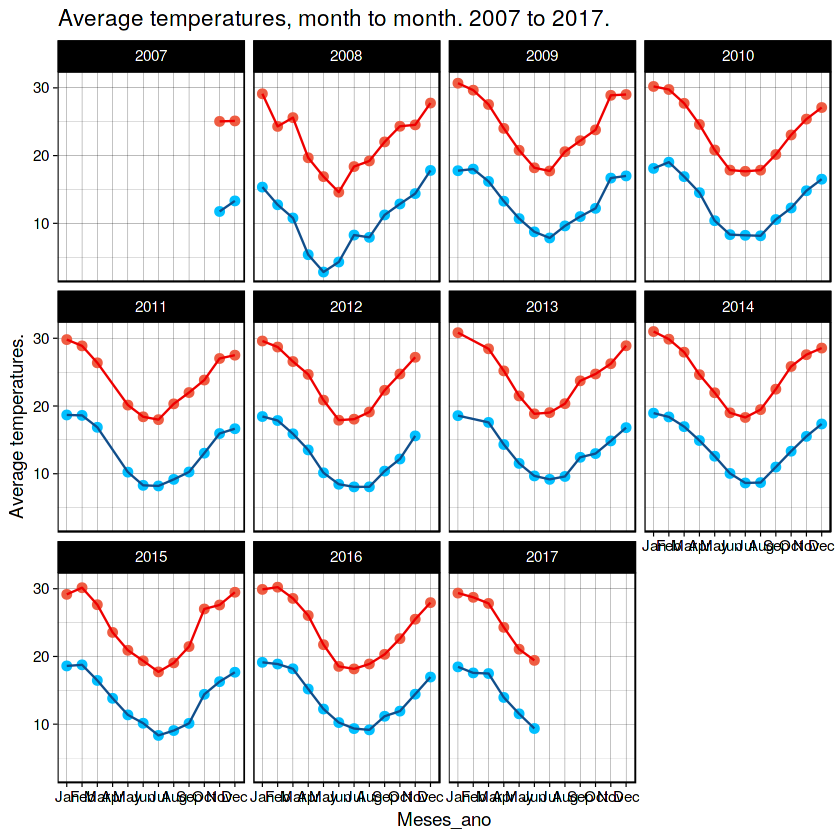

In [51]:
mes_a_mes<-base_complete %>% group_by(Year,Meses_ano) %>% summarize(media_MaxTemp=round(mean(MaxTemp,na.rm = TRUE),2),media_MinTemp=round(mean(MinTemp,na.rm = TRUE),2))
mes_a_mes %>%
    ggplot(mapping = aes(x = Meses_ano))+
        geom_point(aes(y=media_MaxTemp),color="#EE5C42",size=2)+
            geom_line(aes(y=media_MaxTemp),group=1,color="#EE0000")+
                geom_point(aes(y=media_MinTemp),color="#00BFFF",size=2)+
                    geom_line(aes(y=media_MinTemp),group=1,color="#104E8B")+
                        facet_wrap(~Year)+
                            theme_linedraw()+
                                ggtitle(label = "Average temperatures, month to month. 2007 to 2017.")+
                                    ylab(label = "Average temperatures.")
            
        

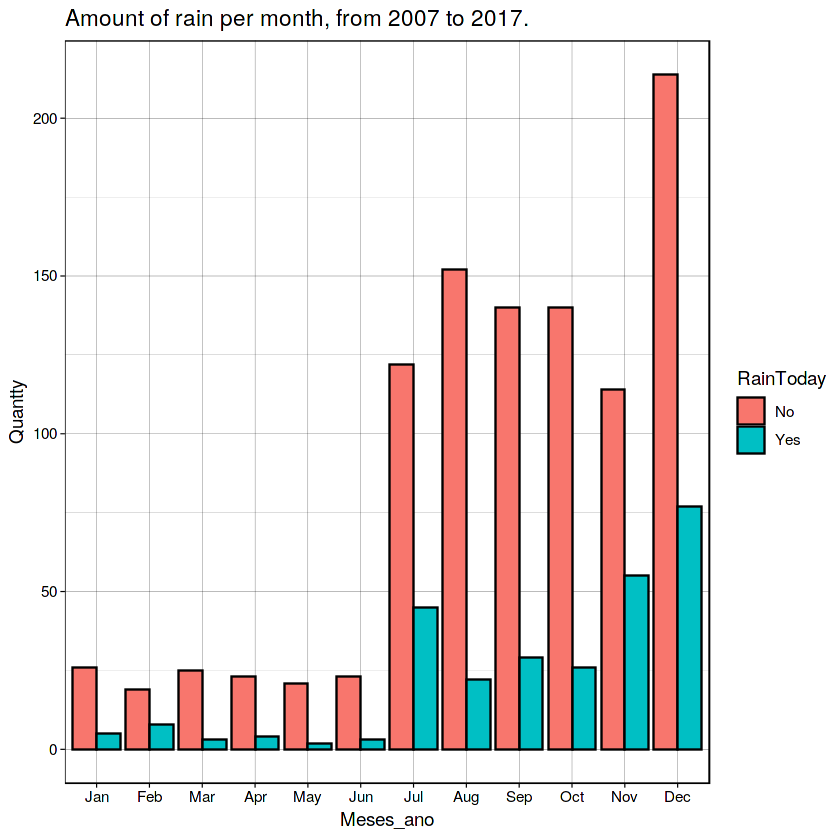

In [52]:


base_complete %>% group_by(Meses_ano) %>% filter(Year == 2008) %>% count(RainToday) %>%
    ggplot()+
        ylab(label = "Quantty")+
            geom_col(mapping = aes(x =Meses_ano, y = n,fill =RainToday ),color="black",position = "dodge")+
                 theme_linedraw()+
                    ggtitle(label = "Amount of rain per month, from 2007 to 2017.")
      
## Para ficar ordenado  .. Meses do ano é preciso estar como fator.

## Identifying days of the week. With abbreviation. 

In [53]:
base_complete<-base_complete %>% mutate(Dias_semana=lubridate::wday(Date,label = TRUE) )

    base_complete<-base_complete[,c(1:4,28,5:27)]




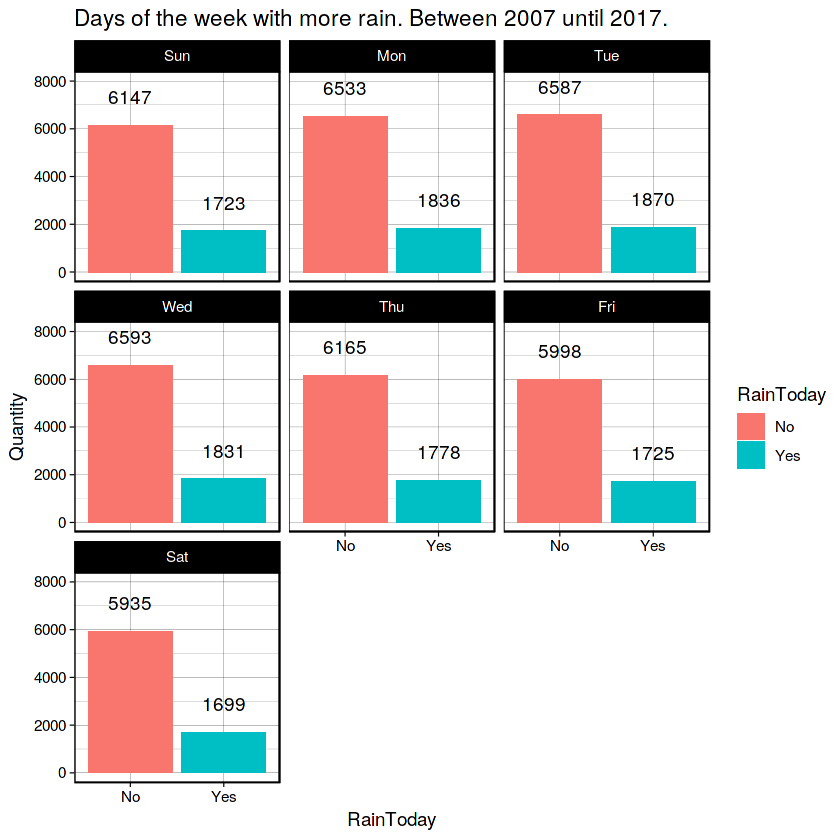

In [54]:
day_week<-base_complete %>% group_by(Dias_semana,RainToday) %>% count(RainToday)

day_week %>% 
    ggplot()+
        geom_col(mapping = aes(x =RainToday, y = n, fill=RainToday ))+
            geom_text(aes(x = RainToday,y = n,label=n),vjust=-1.5)+
            facet_wrap(~Dias_semana)+
                    theme_linedraw()+
                        ggtitle(label ="Days of the week with more rain. Between 2007 until 2017." )+
                         ylab(label = "Quantity")+
                        ylim(0,8000)
                    

## Correlation between attributes.

In [56]:
head(base_complete,3)

Indice,Date,Year,Meses_ano,Dias_semana,Location,MinTemp,MaxTemp,Thermal_Amplitude,Rainfall,⋯,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
<int>,<date>,<int>,<fct>,<ord>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<int>,<int>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>
1,2009-01-01,2009,Jan,Thu,Cobar,17.9,35.2,17.3,0,⋯,20,13,1006.3,1004.4,2,5,26.6,33.4,No,No
2,2009-01-02,2009,Jan,Fri,Cobar,18.4,28.9,10.5,0,⋯,30,8,1012.9,1012.1,1,1,20.3,27.0,No,No
3,2009-01-04,2009,Jan,Sun,Cobar,19.4,37.6,18.2,0,⋯,42,22,1012.3,1009.2,1,6,28.7,34.9,No,No


In [57]:
str(base_complete)



Classes ‘data.table’ and 'data.frame':	56420 obs. of  28 variables:
 $ Indice           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Date             : IDate, format: "2009-01-01" "2009-01-02" ...
 $ Year             : int  2009 2009 2009 2009 2009 2009 2009 2009 2009 2009 ...
 $ Meses_ano        : Factor w/ 12 levels "Jan","Feb","Mar",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Dias_semana      : Ord.factor w/ 7 levels "Sun"<"Mon"<"Tue"<..: 5 6 1 2 3 4 5 6 7 1 ...
 $ Location         : chr  "Cobar" "Cobar" "Cobar" "Cobar" ...
 $ MinTemp          : num  17.9 18.4 19.4 21.9 24.2 27.1 23.3 16.1 19 19.7 ...
 $ MaxTemp          : num  35.2 28.9 37.6 38.4 41 36.1 34 34.2 35.5 35.5 ...
 $ Thermal_Amplitude: num  17.3 10.5 18.2 16.5 16.8 9 10.7 18.1 16.5 15.8 ...
 $ Rainfall         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Evaporation      : num  12 14.8 10.8 11.4 11.2 13 9.8 14.6 12 11 ...
 $ Sunshine         : num  12.3 13 10.6 12.2 8.4 0 12.6 13.2 12.3 12.7 ...
 $ WindGustDir      : chr  "SSW" "S" "NNE" "WNW" ...
 $ Wi

In [58]:
cor_base<-base_complete[,c("MinTemp","MaxTemp","Rainfall","Evaporation","Sunshine","WindGustSpeed","WindSpeed9am","WindSpeed3pm","Humidity9am","Humidity3pm","Pressure9am","Pressure3pm","Cloud9am","Cloud3pm","Temp9am","Temp3pm")]

cor_base<-cor(cor_base)

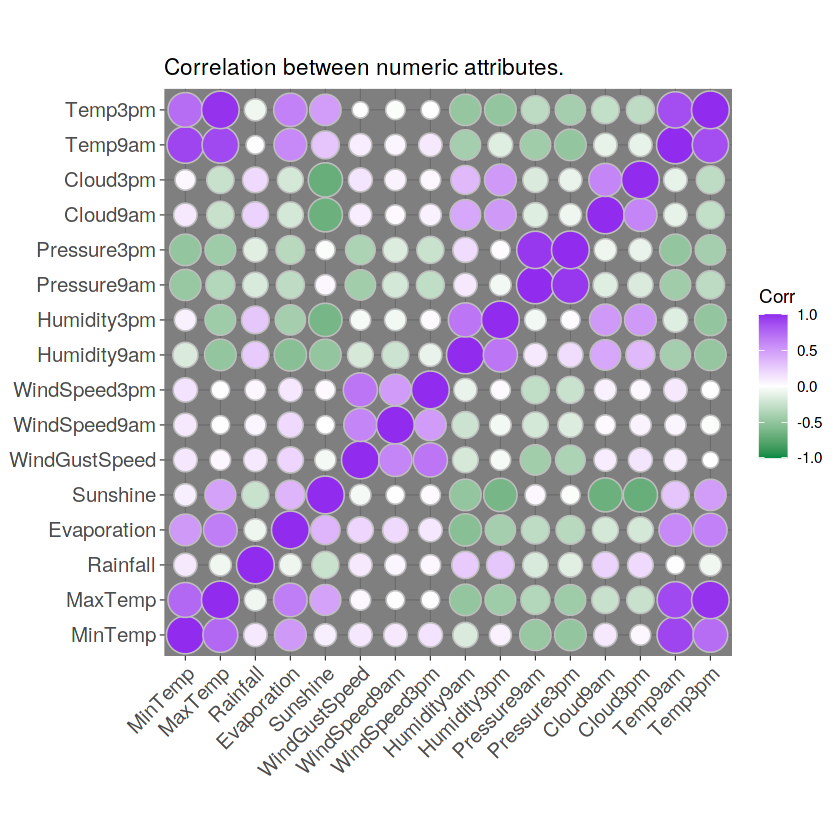

In [59]:
library(ggcorrplot)

ggcorrplot(cor_base,method = "circle", colors = c("#008B45","white","#912CEE"),ggtheme = ggplot2::theme_dark)+
    ggtitle(label = "Correlation between numeric attributes.")

# Creating a machiene learning model with cross validation.

## First turn attributes into factors.

In [15]:
base_complete<-base_complete[,c(6:28)]

base_complete$Location<-as_factor(base_complete$Location)
base_complete$WindGustDir<-as_factor(base_complete$WindGustDir)
base_complete$WindDir9am<-as_factor(base_complete$WindDir9am)
base_complete$WindDir3pm<-as_factor(base_complete$WindDir3pm)
base_complete$RainToday<-as_factor(base_complete$RainToday)
base_complete$RainTomorrow<-as_factor(base_complete$RainTomorrow)

In [16]:
library(caret)

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress




## Random Forest model using cross validation with two resampling iterations.

In [22]:
CT_treinamneto<-trainControl(method = "cv",number = 2)
modelo<-train(RainTomorrow~.,data = base_complete,trControl = CT_treinamneto,method = "rf")

Random Forest 

56420 samples
   22 predictor
    2 classes: 'No', 'Yes' 

No pre-processing
Resampling: Cross-Validated (2 fold) 
Summary of sample sizes: 28209, 28211 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.8394009  0.4031708
  45    0.8626196  0.5533547
  88    0.8609004  0.5499307

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 45.

## The best accuracy is with mtry 45.

In [23]:
modelo$results$Accuracy[2]

[1] 0.8626196

In [30]:
acuracia<-modelo$results
acuracia<-as_tibble(acuracia)
acuracia

mtry,Accuracy,Kappa,AccuracySD,KappaSD
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,0.8394009,0.4031708,0.0006848282,0.0023786243
45,0.8626196,0.5533547,0.0003327428,0.0004377929
88,0.8609004,0.5499307,0.0011600010,0.0020248792


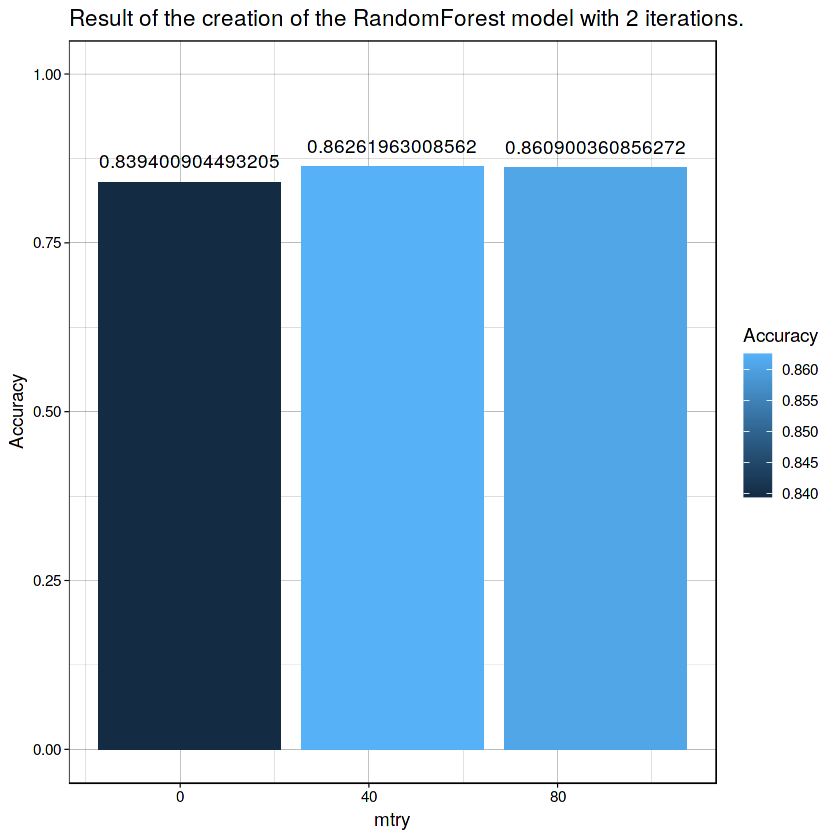

In [42]:
acuracia %>% 
    ggplot(mapping = aes(x =mtry,y =  Accuracy, fill=Accuracy))+
            geom_text(aes(x=mtry,y=Accuracy, label=Accuracy), vjust=-1)+
        ylim(0,1)+
        geom_col()+
            ggtitle(label = "Result of the creation of the RandomForest model with 2 iterations.")+
                theme_linedraw()